## Importación de librerias

In [1]:
import pandas as pd;
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Colección de datos

In [3]:
url_data = 'https://raw.githubusercontent.com/jleon253/house-rental-prediction/main/data/housing_1.csv';
df_init = pd.read_csv(url_data);

In [ ]:
ds = df_init.sample(5)
ds

In [4]:
df_init.shape

(4728, 12)

# Preprocesamiento

## Exploración y limpieza de datos

In [ ]:
# Revisión de valores NaN o desconocidos
df_init.isna().sum()

In [ ]:
# Revisión de valores nulos
df_init.isnull().sum()

In [ ]:
# Revisión de valores duplicados
df_init.duplicated().sum()

In [ ]:
df_init.info()

## Explorando relacion entre variables

In [ ]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='Size', y='Rent')
plt.title('Relación entre Size y Rent')
plt.show()

In [ ]:
# Registro con el alquiler más alto
rent_high = df_init.query('Rent == 3.5e+06')
rent_high

In [ ]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='BHK', y='Rent')
plt.title('Relación entre BHK y Rent')
plt.show()

In [ ]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='Bathroom', y='Rent')
plt.title('Relación entre Bathroom y Rent')
plt.show()

## Codificación categoríca en numerica

Dado que las demas columnas son categoricas, se deben convertir en númericas para un modelado eficiente.

In [5]:
# Se listan las columnas categoricas
category_columns = [
  'Floor',
  'Area Type',
  'Area Locality',
  'City',
  'Furnishing Status',
  'Tenant Preferred',
  'Point of Contact'
];

In [ ]:
# Se muestran la cantidad de datos categoricos existentes en el dataset
for col in category_columns:
  print(df_init[col].value_counts())

In [7]:
# Codificando valores categoricos en númericos
le = LabelEncoder()

df_numerical = df_init
# Se retira la columna, dado que el tipo fecha no se puede convertir en float para ser leido por la grafica
del df_numerical['Posted On']

for category_col in category_columns:
  df_numerical[category_col] = le.fit_transform(df_numerical[category_col])

df_numerical

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,454,2,220,4,2,1,2,2
1,2,20000,800,14,2,1523,4,1,1,1,2
2,2,17000,1000,14,2,1755,4,1,1,1,2
3,2,10000,800,10,2,525,4,2,1,1,2
4,2,7500,850,10,1,1885,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4723,2,17000,840,270,2,317,3,0,1,2,2
4724,2,15000,600,192,1,1333,3,2,0,1,2
4725,1,9000,650,14,2,247,3,0,1,1,0
4726,2,16000,1100,200,2,247,3,0,2,2,0


In [ ]:
# Dataset númerico
df_numerical.info()

In [ ]:
# Se muestran la cantidad de datos convertidos a númericos que coinciden con los categoricos existentes en el dataset
for c in category_columns:
  print(df_numerical[c].value_counts())

## Buscando correlación

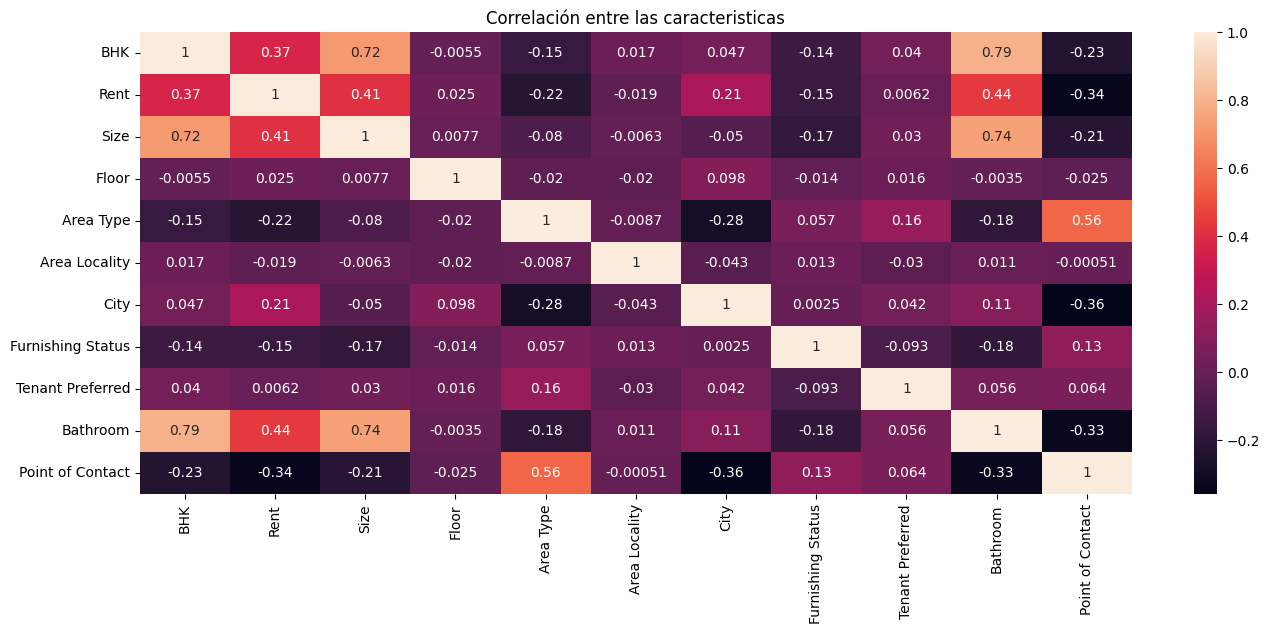

In [8]:
# Se visualiza en un mapa de calor, la correlación entre las caracteristicas
plt.figure(figsize=(16,6))
sns.heatmap(df_numerical.corr(), annot=True)
plt.title('Correlación entre las caracteristicas')
plt.show()

# K-means Clustering

## Relación entre variables

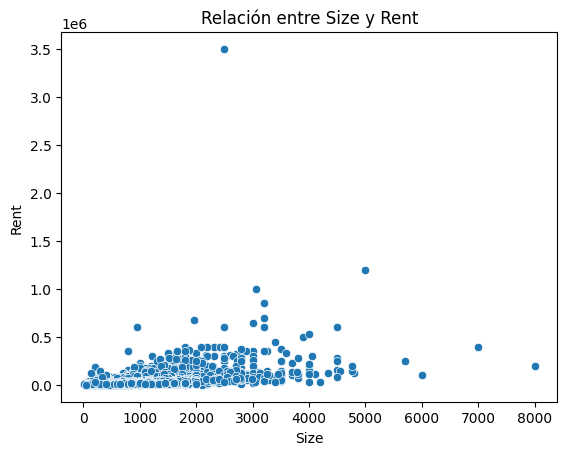

In [9]:
# Tendencias entre las varables explicativas y la variable objetivo
sns.scatterplot(data=df_init, x='Size', y='Rent')
plt.title('Relación entre Size y Rent')
plt.show()

## Implementando agrupación de k-means clustering

### Estandarizadando los datos a la misma magnitud

In [10]:
# Estadistica de la data sin estandarizar
df_numerical.describe()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4728.000000,4.728000e+03,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000,4728.000000
mean,2.082699,3.505223e+04,966.447970,228.963409,1.515017,1089.053934,2.454949,1.238790,0.924069,1.964890,1.354695
std,0.832829,7.824634e+04,634.710489,162.394722,0.500673,631.418420,1.790273,0.684595,0.517463,0.885223,0.934968
min,1.000000,1.200000e+03,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,1.000000e+04,550.000000,26.000000,1.000000,550.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,1.600000e+04,850.000000,200.000000,2.000000,1091.500000,2.000000,1.000000,1.000000,2.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,370.000000,2.000000,1627.250000,4.000000,2.000000,1.000000,2.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,478.000000,2.000000,2228.000000,5.000000,2.000000,2.000000,10.000000,2.000000


In [11]:
# Llevando las variables a la misma magnitud
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

# Estadisticas de la data estandarizada
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,4.728000e+03,4728.000000,4.728000e+03,4728.000000,4.728000e+03,4.728000e+03,4.728000e+03,4.728000e+03,4.728000e+03,4.728000e+03,4728.000000
mean,-1.382613e-16,0.000000,-3.005680e-17,0.000000,-1.442726e-16,3.606816e-17,-7.213632e-17,-7.814768e-17,9.918744e-17,7.814768e-17,0.000000
std,1.000106e+00,1.000106,1.000106e+00,1.000106,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106e+00,1.000106
min,-1.300163e+00,-0.432682,-1.507064e+00,-1.410068,-3.026280e+00,-1.724956e+00,-1.371416e+00,-1.809714e+00,-1.785957e+00,-1.090112e+00,-1.449075
25%,-9.930921e-02,-0.320205,-6.561921e-01,-1.249947,-1.028758e+00,-8.538093e-01,-8.127827e-01,-3.488418e-01,1.467518e-01,-1.090112e+00,-1.449075
50%,-9.930921e-02,-0.243516,-1.834857e-01,-0.178371,9.687646e-01,3.874332e-03,-2.541497e-01,-3.488418e-01,1.467518e-01,3.966649e-02,0.690262
75%,1.101545e+00,-0.026231,3.680052e-01,0.868572,9.687646e-01,8.524506e-01,8.631164e-01,1.112030e+00,1.467518e-01,3.966649e-02,0.690262
max,4.704107e+00,44.287240,1.108268e+01,1.533689,9.687646e-01,1.803981e+00,1.421749e+00,1.112030e+00,2.079460e+00,9.077892e+00,0.690262


In [57]:
pd.DataFrame(df_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.099309,-0.320205,0.210436,1.385885,0.968765,-1.376497,0.863116,1.112030,0.146752,0.039666,0.690262
1,-0.099309,-0.192390,-0.262270,-1.323849,0.968765,0.687329,0.863116,-0.348842,0.146752,-1.090112,0.690262
2,-0.099309,-0.230735,0.052868,-1.323849,0.968765,1.054794,0.863116,-0.348842,0.146752,-1.090112,0.690262
3,-0.099309,-0.320205,-0.262270,-1.348483,0.968765,-0.893407,0.863116,1.112030,0.146752,-1.090112,0.690262
4,-0.099309,-0.352159,-0.183486,-1.348483,-1.028758,1.260702,0.863116,1.112030,-1.785957,-1.090112,0.690262
...,...,...,...,...,...,...,...,...,...,...,...
4723,-0.099309,-0.230735,-0.199243,0.252723,0.968765,-1.222859,0.304483,-1.809714,0.146752,0.039666,0.690262
4724,-0.099309,-0.256298,-0.577408,-0.227639,-1.028758,0.386387,0.304483,1.112030,-1.785957,-1.090112,0.690262
4725,-1.300163,-0.332987,-0.498623,-1.323849,0.968765,-1.333732,0.304483,-1.809714,0.146752,-1.090112,-1.449075
4726,-0.099309,-0.243516,0.210436,-0.178371,0.968765,-1.333732,0.304483,-1.809714,2.079460,0.039666,-1.449075


### Determinar cantidad de clusters a usar

In [43]:
# Se ajustan multiples modelos de k-means para determinar el número optimo de clusters
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', n_init='auto')
    # Computamos sobre los datos estandarizados
    kmeans.fit(df_scaled)
    # Calculamos la inercia sobre los datos estandarizados
    SSE.append(kmeans.inertia_)

SSE


[52008.000000000065,
 42737.33010838514,
 39260.96487898356,
 35430.09187997674,
 33499.258879783236,
 31657.34625620229,
 30574.7234996994,
 29169.8198436471,
 28336.282763395262,
 27114.023768613362]

Text(0, 0.5, 'Inercia')

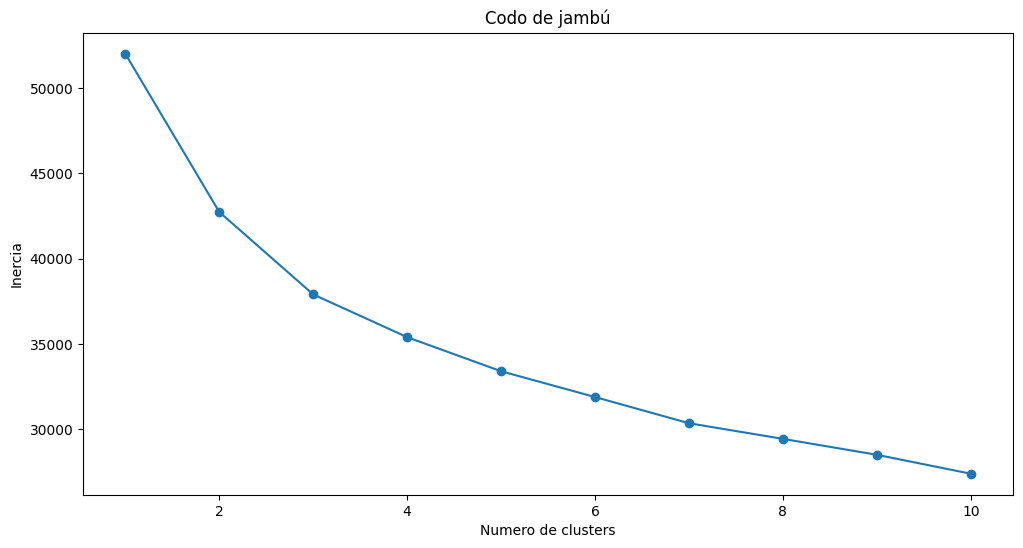

In [36]:
# Convertir los resultados en un dataframe para usar el metodo del "codo"
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.title('Codo de jambú')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')

## Implementando KMeans manual con los clusteres sugeridos

In [53]:
# Número de clusters
k = 4

In [58]:
df_scaled[[1,2]]

array([[-0.09930921, -0.19239006, -0.26227009, -1.32384934,  0.96876464,
         0.68732864,  0.86311642, -0.34884183,  0.14675176, -1.09011167,
         0.69026218],
       [-0.09930921, -0.23073457,  0.05286754, -1.32384934,  0.96876464,
         1.05479423,  0.86311642, -0.34884183,  0.14675176, -1.09011167,
         0.69026218]])

In [56]:
#Definiendo centroides
X = df_numerical[['Rent', 'Size']]
# X = df_scaled[[1,2]]
Centroids = (X.sample(n=k))
plt.scatter(X['Size'], X['Rent'], c='black')
plt.scatter(Centroids['Size'], Centroids['Rent'], c='red')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'sample'

In [50]:
#Calculando distancia de controides
pd.options.mode.chained_assignment = None  # default='warn'

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Size"]-row_d["Size"])**2
            d2=(row_c["Rent"]-row_d["Rent"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Rent","Size"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Rent'] - Centroids['Rent']).sum() + (Centroids_new['Size'] - Centroids['Size']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Rent","Size"]]

In [51]:
#Graficando clusters encontrados
color = ['green', 'blue', 'yellow', 'pink']

for kl in range(k):
    data=X[X["Cluster"]==kl+1]
    plt.scatter(data["Size"],data["Rent"],c=color[kl])

plt.scatter(Centroids["Size"],Centroids["Rent"],c='red')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.title('Cliusters encontrados entre Size y Rent')
plt.show()

## Implementando KMeans library con los clusteres sugeridos

In [37]:
# Segunda prueba (con más clusters)
# Definiendo la función K-means con k-means++ como inicialización
clustering = KMeans(n_clusters=4, init='k-means++', n_init='auto', max_iter=300)

# Computamos sobre los datos escalados
clustering.fit(df_scaled)

# Se predice
#pred = clustering.predict(df_scaled)

KMeans(n_clusters=4, n_init='auto')

In [38]:
# Agregando clasificación como nueva columna al dataset original
df_init['KMeans_Clusters'] = clustering.labels_
# Agregando clasificación como nueva columna al dataset númerico
df_numerical['KMeans_Clusters'] = clustering.labels_
df_numerical.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,KMeans_Clusters
0,2,10000,1100,454,2,220,4,2,1,2,2,2
1,2,20000,800,14,2,1523,4,1,1,1,2,2
2,2,17000,1000,14,2,1755,4,1,1,1,2,3
3,2,10000,800,10,2,525,4,2,1,1,2,2
4,2,7500,850,10,1,1885,4,2,0,1,2,2


### Visualizando los clusters

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_houses = pca.fit_transform(df_scaled)
pca_houses_df = pd.DataFrame(data=pca_houses, columns=['Componente_1','Componente_2'])
pca_houses_comps = pd.concat([pca_houses_df, df_init[['KMeans_Clusters']]], axis=1)

pca_houses_comps

,Componente_1,Componente_2,Componente_3,KMeans_Clusters
0,-0.526315,0.252237,-1.262653,2
1,-1.064824,0.301135,0.107333,2
2,-0.938803,0.414058,0.279491,3
3,-1.343132,0.170668,-0.042876,2
4,-0.872024,-1.165294,2.455817,2
...,...,...,...,...
4723,-0.312121,0.710025,-1.541303,3
4724,-1.073572,-1.166338,1.784833,2
4725,-0.927418,-0.758648,-1.046590,1
4726,0.575660,0.259310,-2.610436,3


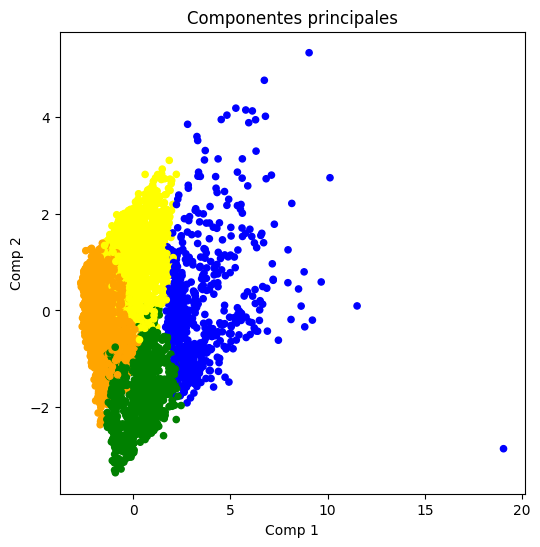

In [40]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Comp 1')
ax.set_ylabel('Comp 2')
ax.set_title('Componentes principales')

color_theme = np.array(['blue', 'green', 'orange', 'yellow'])
ax.scatter(
  x= pca_houses_comps.Componente_1, 
  y= pca_houses_comps.Componente_2, 
  c=color_theme[pca_houses_comps.KMeans_Clusters], 
  s=20
)

plt.show()

In [ ]:
#frame = pd.DataFrame(df_scaled)
#frame['cluster'] = pred
#frame['cluster'].value_counts()